In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
from sklearn import preprocessing

In [3]:
df = pd.read_csv('crypto-markets.csv', parse_dates=['date'])

In [4]:
cryptos = [] #Contains top 40 crypto-currency
for _ in range(40):
    cryptos.append(df[df['ranknow']==_+1])

In [21]:
def predict_price(dfm):  #predicts the future prices of crypto-currency given past prices and display graphs
    #print (dfm.head())
    crypt_name = dfm['slug'].iloc[0]
    features = dfm[["open","high","low","close"]].values
    #print(features)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(features)
    
    X_train = x_scaled[:-50,:3]
    Y_train = x_scaled[:-50,3]
    X_test = x_scaled[-50:,:3]
    Y_test = x_scaled[-50:,3]
    
    X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    
    #LSTM model using keras
    model = Sequential()
    model.add(LSTM(50,
               input_shape = (None,1),
               return_sequences = True
              ))
    model.add(Dropout(0.1))
    model.add(LSTM(55, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(35))
    model.add(Dense(1))
    model.add(Activation('relu'))

    model.compile(loss="mse", optimizer="adam")
    
    model.fit(X_train,Y_train, batch_size=50, epochs=60, verbose=0, validation_split=0.05)
    pred = model.predict(X_test)
    # plots the graph for the predictions of crypto-currency
    Y_test = np.array(Y_test).reshape(pred.shape[0],1)
    plt.plot(Y_test)
    plt.plot(pred)
    plt.legend(['Actual Price','Predicted Price'])
    plt.title(crypt_name+' prediction')
    plt.show()
    

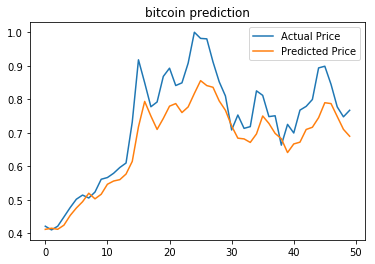

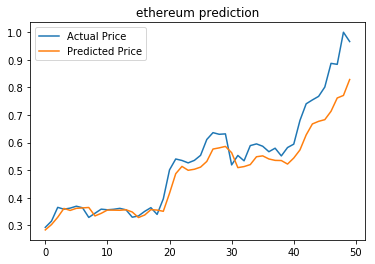

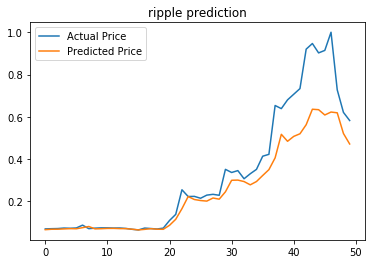

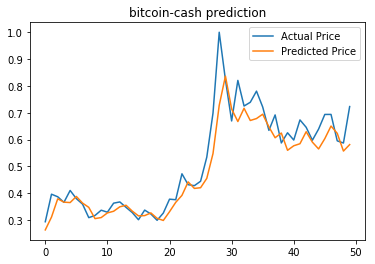

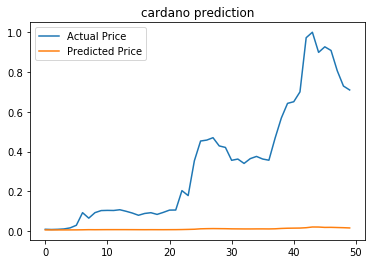

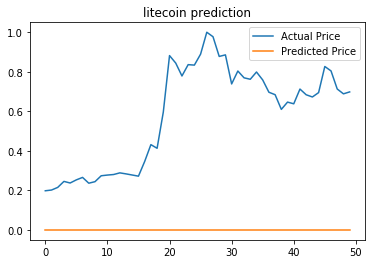

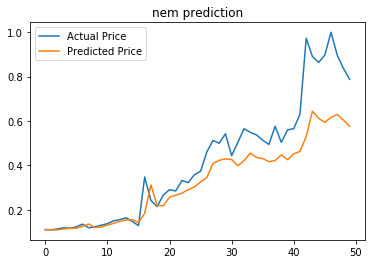

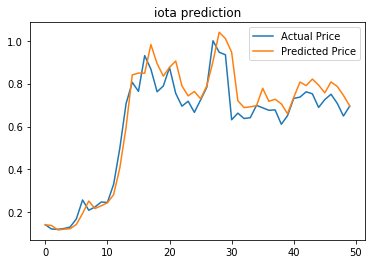

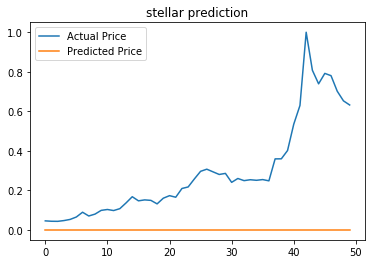

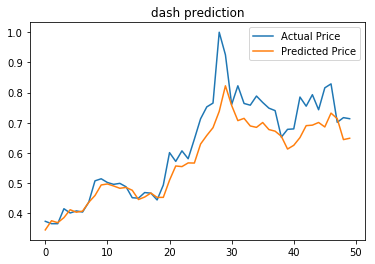

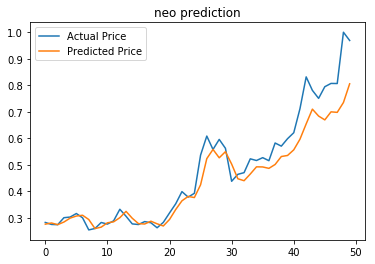

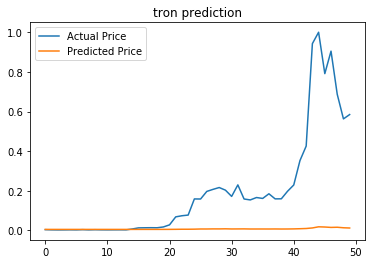

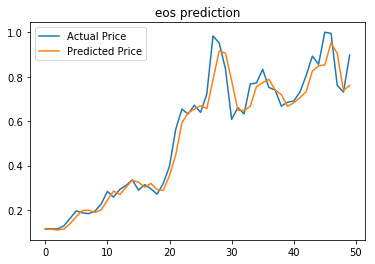

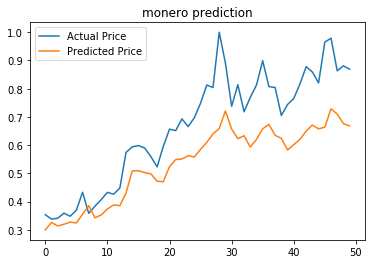

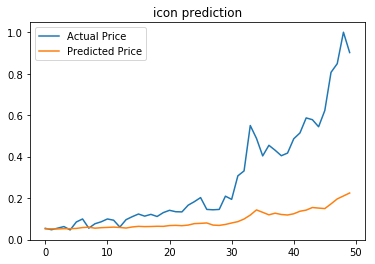

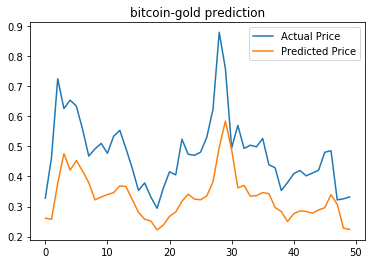

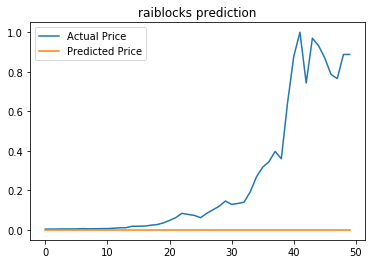

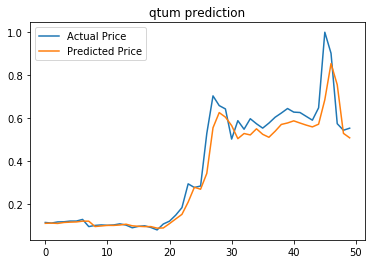

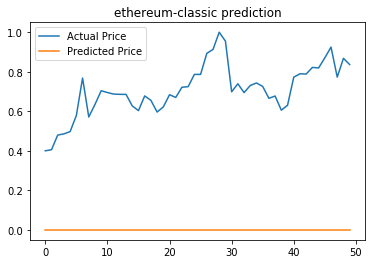

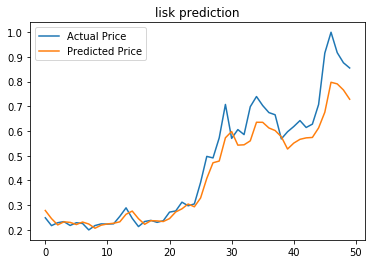

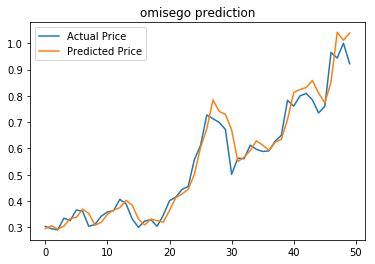

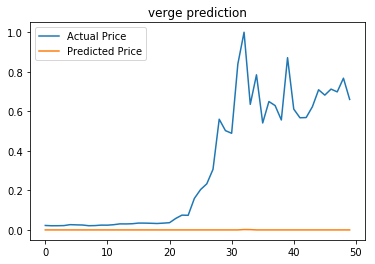

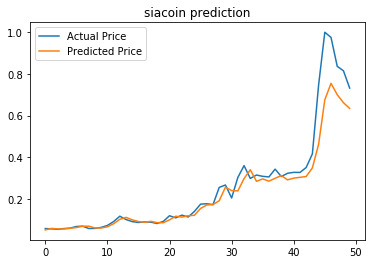

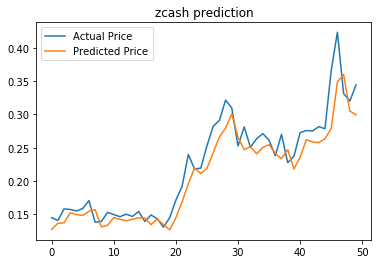

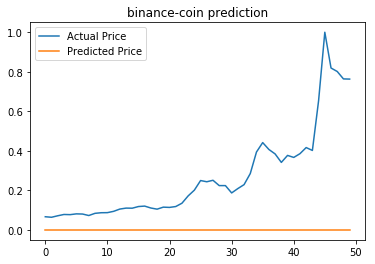

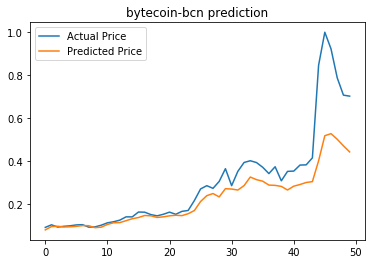

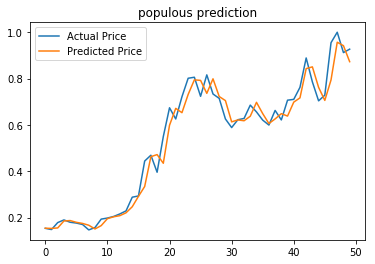

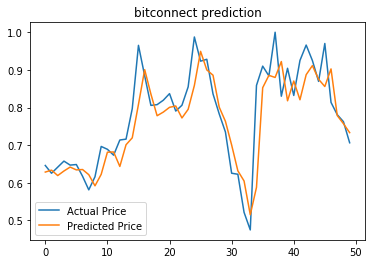

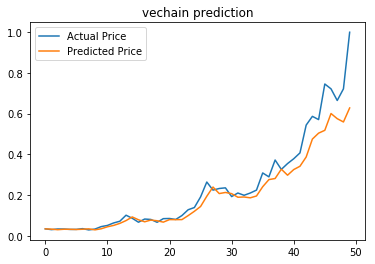

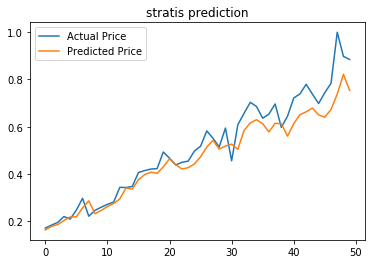

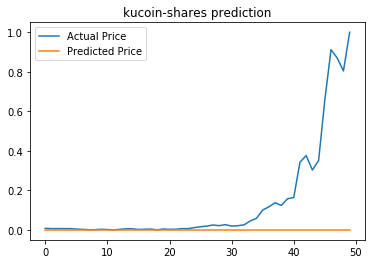

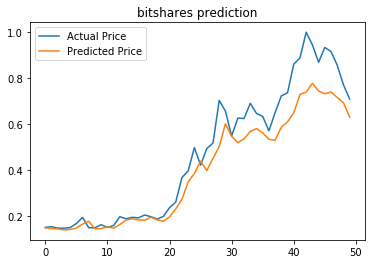

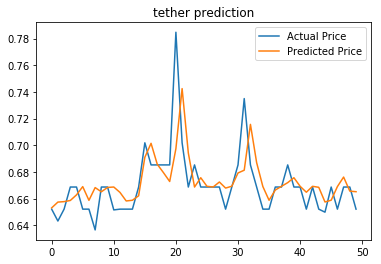

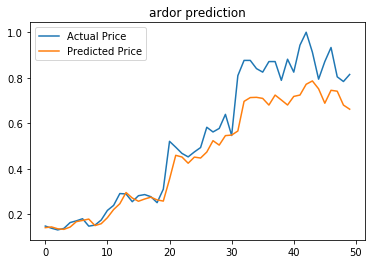

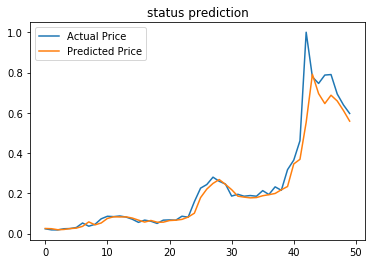

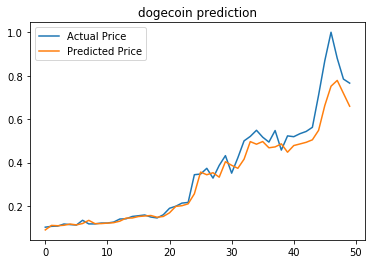

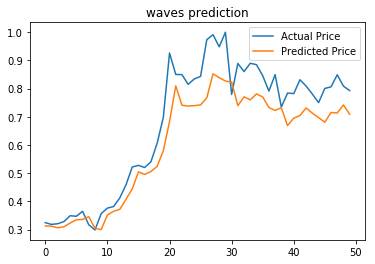

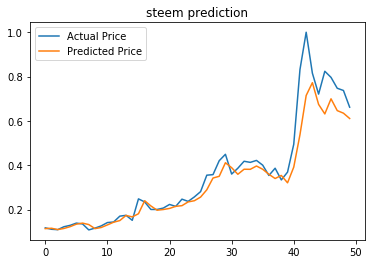

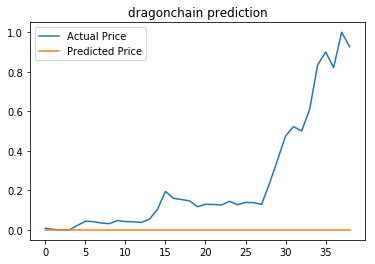

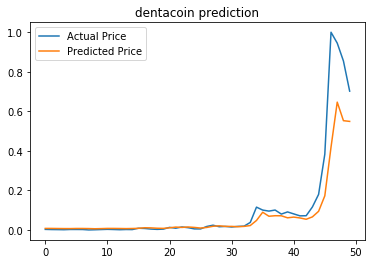

In [22]:
for crypt in cryptos:
    predict_price(crypt)